# Análisis de la base de datos 
## Universidad de los Andes - Smurfit Westrock
### Poyecto Intermedio de Consultoría Empresarial (PICE) 202520
Daniel Benavides

This code performs an exploratory and preparatory analysis of Smurfit Westrock’s payment data. It begins by importing and cleaning raw datasets from Excel or CSV files, addressing missing values, duplicates, and inconsistencies. The data is then transformed through normalization of numerical variables and encoding of categorical ones such as suppliers, cost centers, and expense types. Exploratory Data Analysis (EDA) is conducted to visualize payment distributions, identify outliers and temporal trends, and examine correlations among key variables. Additionally, feature engineering is applied to create new indicators that capture behavioral patterns and transaction frequency, ensuring the dataset is ready for anomaly detection models. This analysis provides preliminary insights and recommendations to guide the development of Machine Learning models and improve overall data quality.

In [1]:
# Data extraction libraries
import numpy as np
import pandas as pd

# Data visualizaton libraries 
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"
import altair as alt

from matplotlib import font_manager
plt.rcParams['font.family'] = 'Arial'

Data downloaded as Excel files

In [2]:
# Read and concatenate Excel files
df_excel = pd.concat([
    pd.read_excel("PICE BD 2025-Parte 1.xlsx"),
    pd.read_excel("PICE BD 2025-Parte 2.xlsx"),
    pd.read_excel("PICE BD 2025-Parte 3.xlsx")
], ignore_index=True)

columns_to_drop = [
    "Número Documento Referencia", "Material", "Número de Cuenta",
    "Acreedor", "Número Documento", "Descripción", "Documento Compras",
    "Pos Docum Compras", "Año", "Activo Fijo", "Clase de Documento",
    "Clase de Actividad", "Deudor", "Elemento PEP", "Orden", "Pedido Cliente"
]

df_excel = (df_excel
            .dropna(subset=["Número Documento Referencia"])
            .drop(columns=columns_to_drop, errors='ignore'))

df_excel

FileNotFoundError: [Errno 2] No such file or directory: 'PICE BD 2025-Parte 1.xlsx'

### PICE BD 2025 JOINT CSV FILE

In [3]:
%pip install openpyxl

import pandas as pd

df1 = pd.read_excel("/Users/simonsolis/Desktop/PICE/PICE BD 2025-Parte 1.xlsx", sheet_name="PICE BD")
df2 = pd.read_excel("/Users/simonsolis/Desktop/PICE/PICE BD 2025-Parte 2.xlsx", sheet_name="PICE BD")
df3 = pd.read_excel("/Users/simonsolis/Desktop/PICE/PICE BD 2025-Parte 3.xlsx", sheet_name="PICE BD")

df = pd.concat([df1, df2, df3], ignore_index=True)
print(df.columns)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Index(['Número Documento Referencia', 'Material', 'Número de Cuenta',
       'Denominación', 'Centro de Coste', 'En moneda de la sociedad',
       'Cantidad', 'Acreedor', 'Número Documento', 'Usuario', 'Descripción',
       'Período', 'Documento Compras', 'Clase de Movimiento V',
       'Fecha Documento', 'Fecha Contable', 'Pos Docum Compras', 'Clase',
       ' Año', 'Activo Fijo', 'Tipo de Documento', 'Centro',
       'Centro de Beneficio', 'Clase de Factura', 'Clase de Documento',
       'Clase de Actividad', 'Deudor', 'División', 'Elemento PEP',
       'Fecha Entrada', 'Fecha Valor', 'Hora', 'Ledger', 'Orden',
       'Pedido Cliente', 'Se ha anulado el Documento', 'Sector'],
      dtype='object')


Data downloaded as CSV file (ideal)

In [42]:
df_csv = df_excel.to_csv("PICE BD 2025.csv", index=False)
df_csv = pd.read_csv("PICE BD 2025.csv", low_memory=False)
df_csv

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446673,Mecanica blanqueada,NaN,-16455980736,-9523137.0,ULLOAFE,1,907,31.01.2025,31.01.2025,WA,...,60.0,PC01,NaN,31.01.2025,8A,NaN,NaN,NaN,NaN,NaN
446674,Mecanica blanqueada,NaN,-17106510528,-9899601.0,ULLOAFE,7,907,31.07.2025,31.07.2025,WA,...,60.0,PC01,NaN,31.07.2025,8A,NaN,NaN,NaN,NaN,NaN
446675,Mecanica blanqueada,NaN,-17288347968,-10004831.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN
446676,Mecanica blanqueada,NaN,-17304230016,-10014022.0,ULLOAFE,5,907,31.05.2025,31.05.2025,WA,...,60.0,PC01,NaN,31.05.2025,8A,NaN,NaN,NaN,NaN,NaN


### Data Cleaning and Transformation

In [43]:
db = df_csv.copy()
db.head()

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Centro,Centro de Beneficio,Clase de Factura,División,Fecha Entrada,Fecha Valor,Hora,Ledger,Se ha anulado el Documento,Sector
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:24:31,8A,NaN,GE
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,60.0,PC01,NaN,3,03.06.2025,31.05.2025,10:52:52,8A,NaN,GE
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,60.0,MC04,NaN,6,03.06.2025,31.05.2025,11:02:51,8A,NaN,GE


In [44]:
def clean_numeric_series(s: pd.Series) -> pd.Series:
    s = s.astype(str)
    s = s.str.replace(r'[^\d\-\.,]', '', regex=True)
    s = s.str.replace(',', '', regex=False)
    return pd.to_numeric(s, errors='coerce')

# En el dataframe, existen registro anulados marcados ("X") y registros no anulados (NaN)
# Transformar "X" a 1 y NaN a 0 en la columna "Se ha anulado el Documento"
db["Se ha anulado el Documento"] = db["Se ha anulado el Documento"].apply(lambda x: 1 if x == "X" else 0)

# Transform date columns
db["Fecha Entrada"] = pd.to_datetime(db["Fecha Entrada"], errors='coerce')
db["Año Entrada"] = db["Fecha Entrada"].dt.year.round(0).astype('Int64')
db["Mes Entrada"] = db["Fecha Entrada"].dt.month.round(0).astype('Int64')
db["Dia Entrada"] = db["Fecha Entrada"].dt.day.round(0).astype('Int64')

db["Fecha Valor"] = pd.to_datetime(db["Fecha Valor"], errors='coerce', dayfirst=True)
db["Año Valor"] = db["Fecha Valor"].dt.year.round(0).astype('Int64')
db["Mes Valor"] = db["Fecha Valor"].dt.month.round(0).astype('Int64')
db["Dia Valor"] = db["Fecha Valor"].dt.day.round(0).astype('Int64')

In [45]:
db.head()

,Denominación,Centro de Coste,En moneda de la sociedad,Cantidad,Usuario,Período,Clase de Movimiento V,Fecha Documento,Fecha Contable,Clase,...,Hora,Ledger,Se ha anulado el Documento,Sector,Año Entrada,Mes Entrada,Dia Entrada,Año Valor,Mes Valor,Dia Valor
0,Mecanica blanqueada,NaN,17360785728,10046751.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:24:31,8A,0,GE,2025,3,6,2025,5,31
1,Mecanica blanqueada,NaN,17304230016,10014022.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:52:52,8A,0,GE,2025,3,6,2025,5,31
2,Kraft pino ( ksw ),NaN,14253494931,7887933.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:24:31,8A,0,GE,2025,3,6,2025,5,31
3,Kraft pino ( ksw ),NaN,14194668046,7855378.0,ULLOAFE,5,502,31.05.2025,31.05.2025,WE,...,10:52:52,8A,0,GE,2025,3,6,2025,5,31
4,Kraft pino ( ksw ),MC4006,14180625849,7847607.0,ULLOAFE,5,201,31.05.2025,31.05.2025,WA,...,11:02:51,8A,0,GE,2025,3,6,2025,5,31


### Relevant categorical variables

In [47]:
variables = ["Centro de Coste", "Usuario", "Período", 
             "Clase", "Tipo de Documento", "Centro de Beneficio", 
             "Clase de Factura", "División", "Se ha anulado el Documento",
             "Sector"]

db[variables].nunique().sort_values(ascending=False)

División                      284
Centro de Coste               209
Usuario                       179
Clase                          21
Sector                         18
Clase de Factura               12
Período                         9
Centro de Beneficio             6
Tipo de Documento               2
Se ha anulado el Documento      2
dtype: int64

In [ ]:
# Heatmap of number of transactions by day and month
db_heatmap = db.pivot_table(index="Mes Entrada", columns="Dia Entrada", values="Monto (Millones)", aggfunc="count", fill_value=0)
db_heatmap.index = db_heatmap.index.astype(int)
db_heatmap.columns = db_heatmap.columns.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Transacciones (Entrada) diarias")

In [ ]:
# Heatmap of number of transactions by day and month
db_heatmap = db.pivot_table(index="Mes Valor", columns="Dia Valor", values="Monto (Millones)", aggfunc="count", fill_value=0)
db_heatmap.index = db_heatmap.index.astype(int)
db_heatmap.columns = db_heatmap.columns.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(db_heatmap, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Transacciones (Valor) diarias")

In [ ]:
pio.templates["plotly"].layout.font.family = "Arial"
pio.templates["plotly_white"].layout.font.family = "Arial"
pio.templates.default = "plotly"

In [ ]:
# Monto (millones) transado por Centro de Coste
db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].sum().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Monto (Millones) transado por Centro de Coste")

In [ ]:
# Promedio Monto (millones) transado por Centro de Coste
db_cc_ano = db.groupby(["Centro de Coste"])["Monto (Millones)"].mean().reset_index()

# px.bar(db_cc_ano,
       # x="Centro de Coste",
       # y="Monto (Millones)",
       # title="Promedio del Monto (Millones) transado por Centro de Coste")

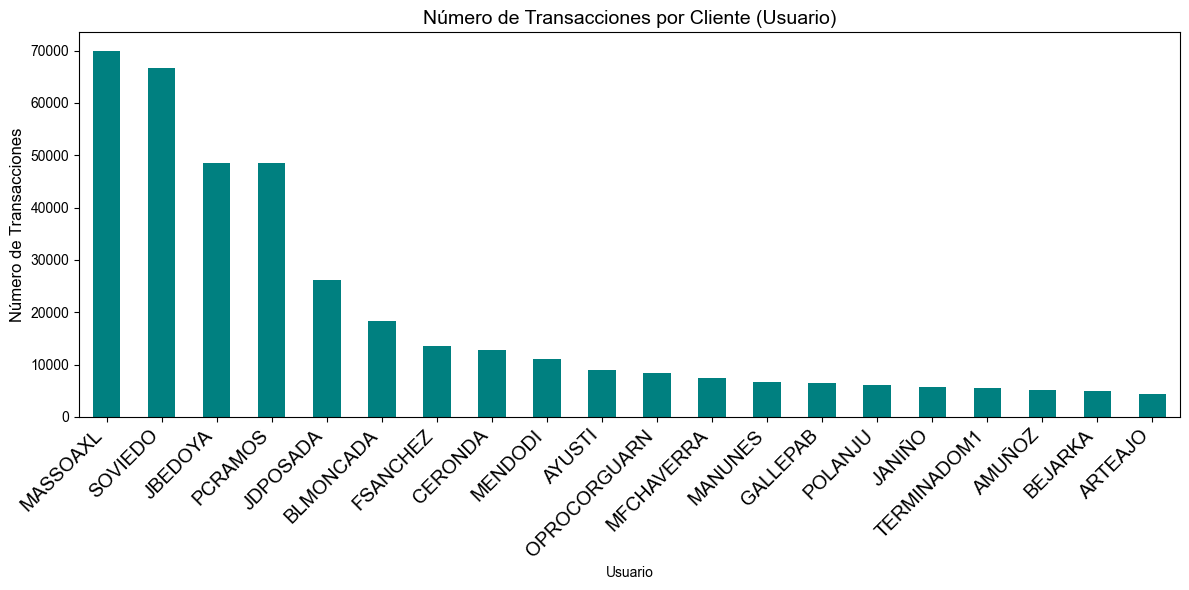

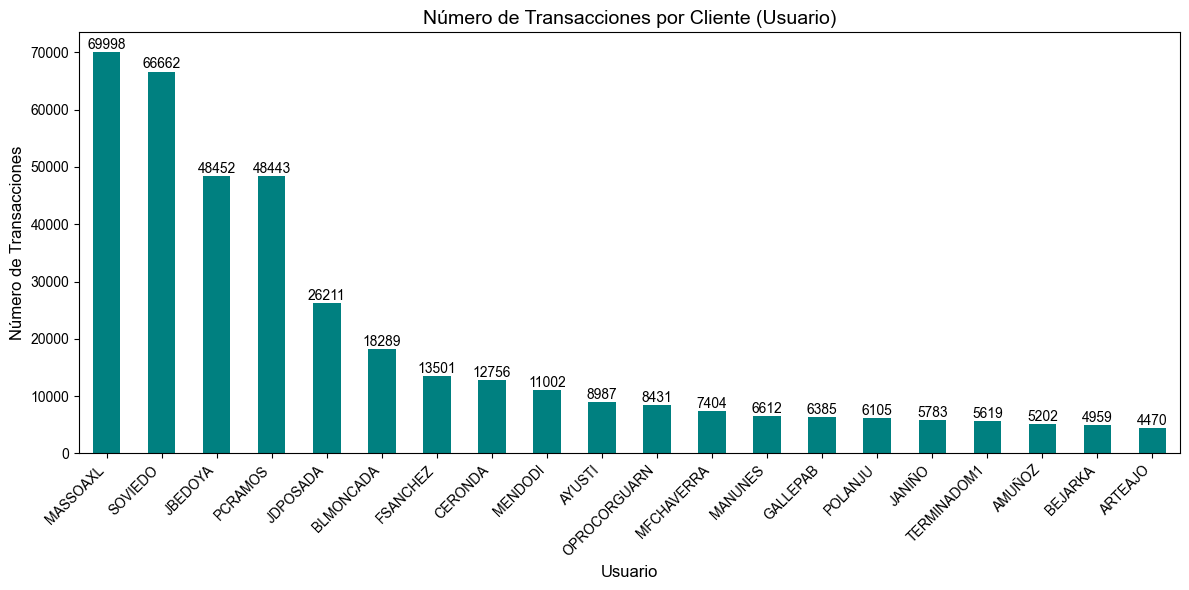

In [4]:

# Agrupar por cliente (Usuario) y contar transacciones
transacciones_por_cliente = df["Usuario"].value_counts().head(20)  # Top 20 clientes

# Crear el gráfico
plt.figure(figsize=(12,6))
transacciones_por_cliente.plot(kind='bar', color='teal')

plt.title("Número de Transacciones por Cliente (Usuario)", fontsize=14)
plt.xlabel("Usuario", fontsize= 10 )
plt.ylabel("Número de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=14)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
bars = transacciones_por_cliente.plot(kind='bar', color='teal')

for i, val in enumerate(transacciones_por_cliente):
    plt.text(i, val + 1, str(val), ha='center', va='bottom', fontsize=10)

plt.title("Número de Transacciones por Cliente (Usuario)", fontsize=14)
plt.xlabel("Usuario", fontsize=12)
plt.ylabel("Número de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [6]:
# Contar número de transacciones rechazadas o anuladas
rechazadas = df[df["Se ha anulado el Documento"].isin(["Sí", "X", "True", True])]
num_rechazadas = len(rechazadas)

print("Número de transacciones rechazadas o anuladas:", num_rechazadas)

total_transacciones = len(df)
porcentaje_rechazadas = (num_rechazadas / total_transacciones) * 100

print(f"Transacciones rechazadas: {num_rechazadas} ({porcentaje_rechazadas:.2f}%)")



Número de transacciones rechazadas o anuladas: 19
Transacciones rechazadas: 19 (0.00%)


In [7]:
import pandas as pd

# Filtrar las transacciones rechazadas o anuladas
rechazadas = df[df["Se ha anulado el Documento"].astype(str).isin(["Sí", "X", "True", "1", "TRUE"])]

# Agrupar por usuario y contar cuántas rechazadas tiene cada uno
rechazadas_por_usuario = (
    rechazadas.groupby("Usuario")
    .size()
    .reset_index(name="Transacciones_Rechazadas")
    .sort_values(by="Transacciones_Rechazadas", ascending=False)
)

# Mostrar los resultados
print("Usuarios con transacciones rechazadas:")
print(rechazadas_por_usuario)


Usuarios con transacciones rechazadas:
    Usuario  Transacciones_Rechazadas
0  MASSOAXL                        19


In [9]:
rechazadas = df[df["Se ha anulado el Documento"].astype(str).isin(["Sí", "X", "True", "1", "TRUE"])]

# Ver qué tipos de documento o clases están asociados a las rechazadas
print(rechazadas["Clase de Documento"].value_counts().head(10))
print(rechazadas["Descripción"].value_counts().head(10))


rechazadas[rechazadas["Descripción"].astype(str).str.contains("error|rechazad|anulad|duplic", case=False, na=False)][
    ["Usuario", "Número Documento", "Descripción"]
]


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)


,Usuario,Número Documento,Descripción


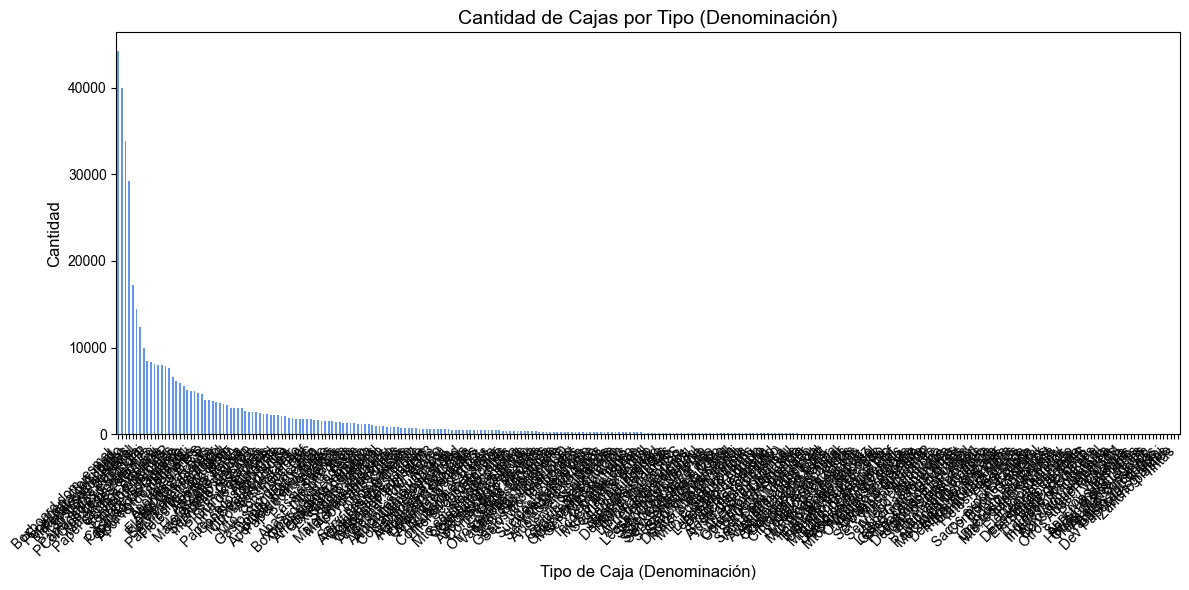

In [11]:
import matplotlib.pyplot as plt

# Contar cuántas veces aparece cada tipo de caja
cajas_por_tipo = df["Denominación"].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
cajas_por_tipo.plot(kind="bar", color="cornflowerblue")

plt.title("Cantidad de Cajas por Tipo (Denominación)", fontsize=14)
plt.xlabel("Tipo de Caja (Denominación)", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


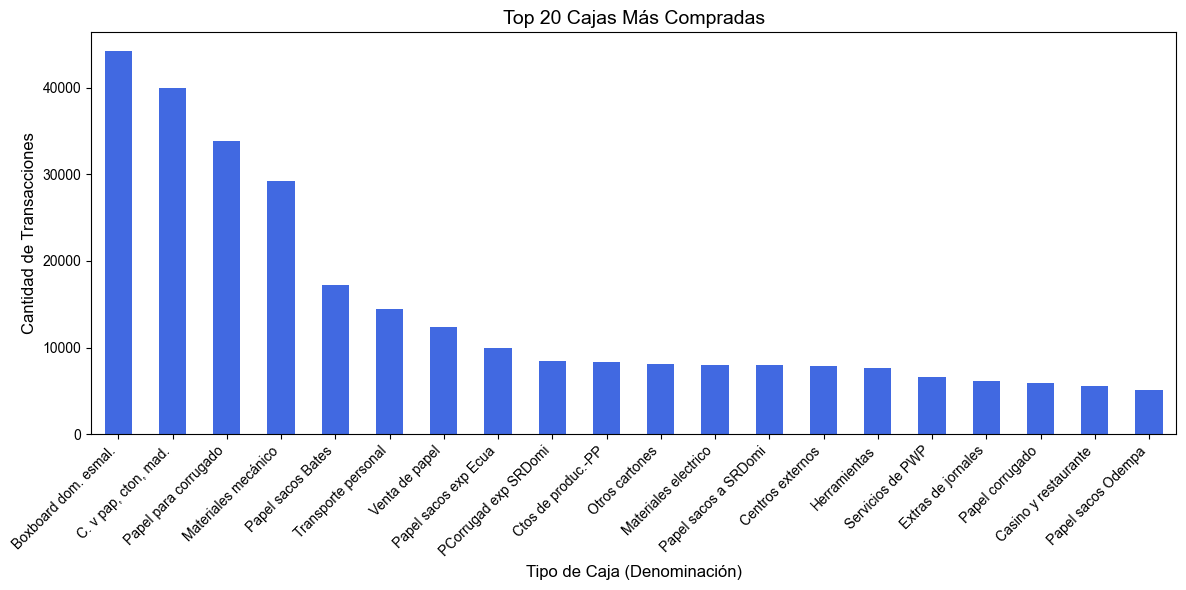

In [12]:
import matplotlib.pyplot as plt

# Contar cuántas veces aparece cada tipo de caja
cajas_por_tipo = df["Denominación"].value_counts().head(20)

# Crear el gráfico de barras
plt.figure(figsize=(12,6))
cajas_por_tipo.plot(kind="bar", color="royalblue")

plt.title("Top 20 Cajas Más Compradas", fontsize=14)
plt.xlabel("Tipo de Caja (Denominación)", fontsize=12)
plt.ylabel("Cantidad de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


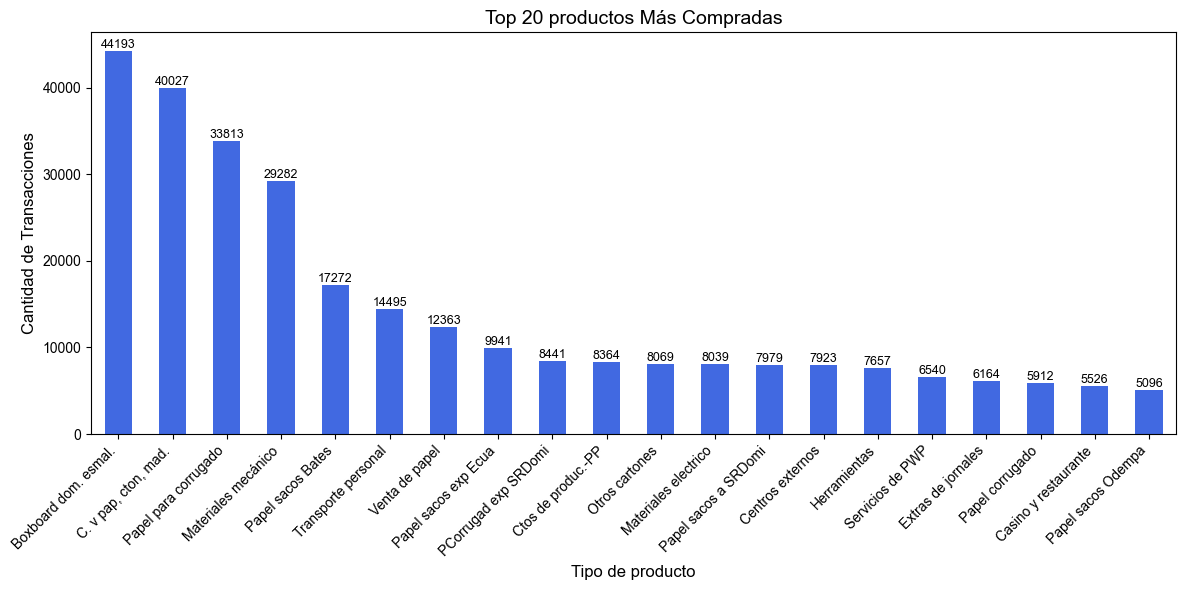

In [ ]:
plt.figure(figsize=(12,6))
bars = cajas_por_tipo.plot(kind="bar", color="royalblue")

# Agregar etiquetas
for i, val in enumerate(cajas_por_tipo):
    plt.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=9)

plt.title("Top 20 productos Más Compradas", fontsize=14)
plt.xlabel("Tipo de producto", fontsize=12)
plt.ylabel("Cantidad de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha= "right")
plt.tight_layout()
plt.show()


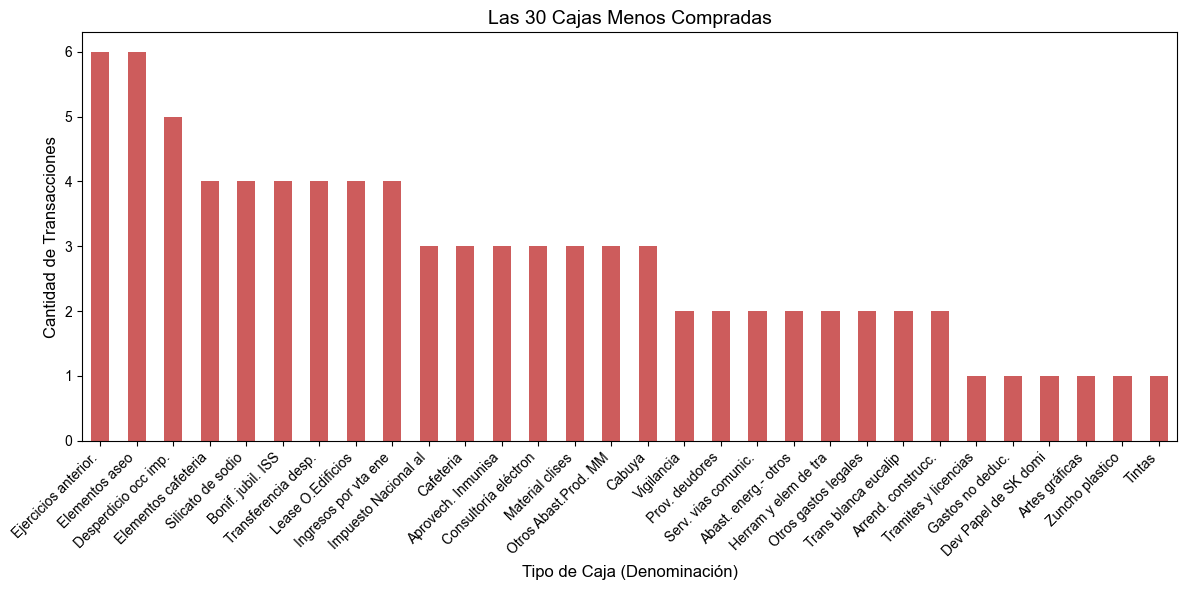

In [15]:
import matplotlib.pyplot as plt

# Contar cuántas veces aparece cada tipo de caja
cajas_por_tipo = df["Denominación"].value_counts().tail(30)

# Crear el gráfico
plt.figure(figsize=(12,6))
cajas_por_tipo.plot(kind="bar", color="indianred")

plt.title("Las 30 Cajas Menos Compradas", fontsize=14)
plt.xlabel("Tipo de Caja (Denominación)", fontsize=12)
plt.ylabel("Cantidad de Transacciones", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [16]:
# Filtrar las transacciones que tienen una "X" en la columna
anuladas = df[df["Se ha anulado el Documento"] == "X"]

# Mostrar las primeras filas para revisar
print(anuladas.head())

# (Opcional) Mostrar cuántas hay en total
print("Número de transacciones anuladas:", len(anuladas))


       Número Documento Referencia  Material Número de Cuenta Denominación  \
56585                       767310   91541.0         41203320  Zona franca   
58744                       767310   91541.0         41203320  Zona franca   
59187                       767310   91595.0         41203320  Zona franca   
59272                       767310   91541.0         41203320  Zona franca   
59464                       767310   91595.0         41203320  Zona franca   

      Centro de Coste  En moneda de la sociedad  Cantidad  Acreedor  \
56585             NaN                    978831       NaN       NaN   
58744             NaN                    899006       NaN       NaN   
59187             NaN                    881413       NaN       NaN   
59272             NaN                    878068       NaN       NaN   
59464             NaN                    872149       NaN       NaN   

       Número Documento   Usuario  ... División  Elemento PEP  Fecha Entrada  \
56585          37064296 

In [17]:
# Filtrar las transacciones anuladas
anuladas = df[df["Se ha anulado el Documento"] == "X"]

# Mostrar columnas clave
resultado = anuladas[["Usuario", "Se ha anulado el Documento"]]

print("Transacciones anuladas y su usuario:")
print(resultado)


Transacciones anuladas y su usuario:
        Usuario Se ha anulado el Documento
56585  MASSOAXL                          X
58744  MASSOAXL                          X
59187  MASSOAXL                          X
59272  MASSOAXL                          X
59464  MASSOAXL                          X
59643  MASSOAXL                          X
59686  MASSOAXL                          X
60157  MASSOAXL                          X
60350  MASSOAXL                          X
60408  MASSOAXL                          X
60588  MASSOAXL                          X
60738  MASSOAXL                          X
60990  MASSOAXL                          X
61080  MASSOAXL                          X
61134  MASSOAXL                          X
61210  MASSOAXL                          X
61378  MASSOAXL                          X
61422  MASSOAXL                          X
61742  MASSOAXL                          X


In [18]:
# Filtrar las transacciones anuladas
anuladas = df[df["Se ha anulado el Documento"] == "X"]

# Seleccionar las columnas relevantes
resultado = anuladas[["Usuario", "Denominación", "Número Documento", "En moneda de la sociedad", "Fecha Documento"]]

# Mostrar los resultados
print("Transacciones anuladas y producto solicitado:")
print(resultado)


Transacciones anuladas y producto solicitado:
        Usuario Denominación  Número Documento  En moneda de la sociedad  \
56585  MASSOAXL  Zona franca          37064296                    978831   
58744  MASSOAXL  Zona franca          37064296                    899006   
59187  MASSOAXL  Zona franca          37064296                    881413   
59272  MASSOAXL  Zona franca          37064296                    878068   
59464  MASSOAXL  Zona franca          37064296                    872149   
59643  MASSOAXL  Zona franca          37064296                    864982   
59686  MASSOAXL  Zona franca          37064296                    863674   
60157  MASSOAXL  Zona franca          37064296                    846662   
60350  MASSOAXL  Zona franca          37064296                    840119   
60408  MASSOAXL  Zona franca          37064296                    838811   
60588  MASSOAXL  Zona franca          37064296                    832267   
60738  MASSOAXL  Zona franca          3706

In [19]:
df.info()
df.isnull().sum()
df.duplicated("Número Documento").sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446678 entries, 0 to 446677
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Número Documento Referencia  446678 non-null  int64  
 1   Material                     268788 non-null  float64
 2   Número de Cuenta             446678 non-null  object 
 3   Denominación                 446678 non-null  object 
 4   Centro de Coste              188181 non-null  object 
 5   En moneda de la sociedad     446678 non-null  int64  
 6   Cantidad                     281959 non-null  float64
 7   Acreedor                     68287 non-null   float64
 8   Número Documento             446678 non-null  int64  
 9   Usuario                      446678 non-null  object 
 10  Descripción                  205598 non-null  object 
 11  Período                      446678 non-null  int64  
 12  Documento Compras            89306 non-null   float64
 13 

np.int64(364900)

In [20]:
df["En moneda de la sociedad"].describe()
df.groupby("Usuario")["En moneda de la sociedad"].mean().sort_values(ascending=False)


Usuario
JWPARRA       1.890110e+09
LYMAYAG       1.561908e+09
AMGOMEZ       3.000970e+08
DUQUENA       2.928023e+08
JFSERNA       2.680111e+08
                  ...     
GONZAMARIA   -9.847091e+06
CEREZJE      -5.122584e+07
SINISJO      -1.559749e+08
JCBERMUDEZ   -1.501534e+09
MONTOYE      -2.807454e+09
Name: En moneda de la sociedad, Length: 179, dtype: float64

In [23]:
import pandas as pd

# Crear una tabla resumen con número y monto total de transacciones por usuario
resumen = (
    df.groupby("Usuario")
    .agg({
        "Usuario": "count",                       # Número de transacciones
        "En moneda de la sociedad": "sum"         # Monto total
    })
    .rename(columns={"Usuario": "Numero_Transacciones",
                     "En moneda de la sociedad": "Monto_Total"})
)

# Calcular la correlación entre número de transacciones y monto total
correlacion = resumen[["Numero_Transacciones", "Monto_Total"]].corr()

print("Correlación entre número de transacciones y monto total:")
print(correlacion)



Correlación entre número de transacciones y monto total:
                      Numero_Transacciones  Monto_Total
Numero_Transacciones               1.00000     -0.38631
Monto_Total                       -0.38631      1.00000


/var/folders/6h/qgvtj3gd52514q26qwd02zfw0000gn/T/ipykernel_43455/990600051.py:1: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



<Axes: xlabel='Fecha Documento'>

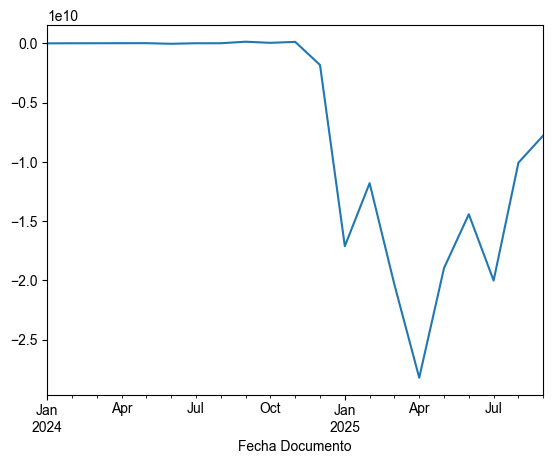

In [22]:
df["Fecha Documento"] = pd.to_datetime(df["Fecha Documento"])
df.groupby(df["Fecha Documento"].dt.to_period("M"))["En moneda de la sociedad"].sum().plot(kind="line")


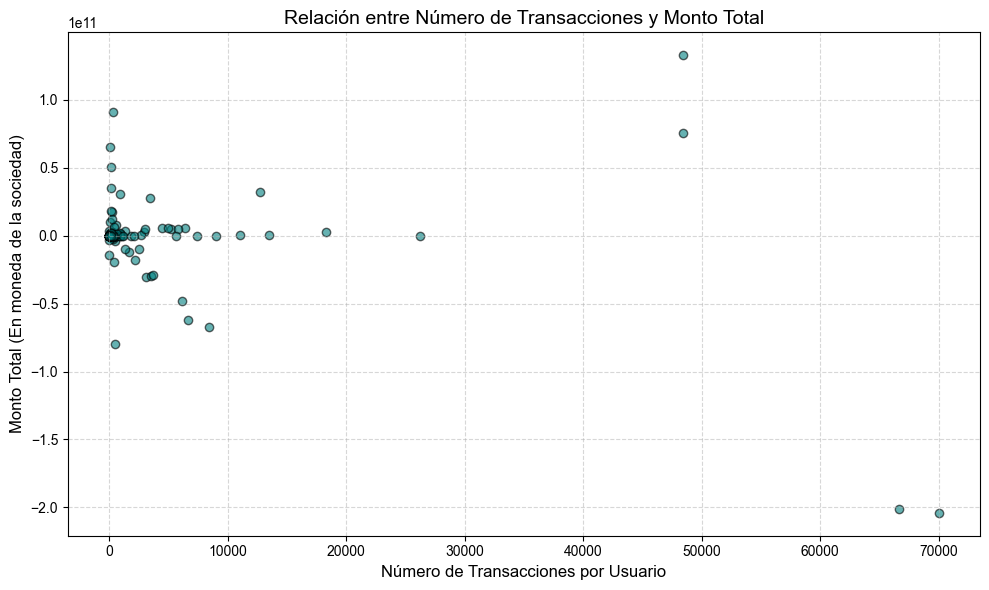

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear tabla resumen (si aún no existe)
resumen = (
    df.groupby("Usuario")
    .agg({
        "Usuario": "count",                       # Número de transacciones
        "En moneda de la sociedad": "sum"         # Monto total
    })
    .rename(columns={
        "Usuario": "Numero_Transacciones",
        "En moneda de la sociedad": "Monto_Total"
    })
)

# Crear el gráfico de dispersión
plt.figure(figsize=(10,6))
plt.scatter(resumen["Numero_Transacciones"], resumen["Monto_Total"],
            alpha=0.6, color="teal", edgecolors="black")

plt.title("Relación entre Número de Transacciones y Monto Total", fontsize=14)
plt.xlabel("Número de Transacciones por Usuario", fontsize=12)
plt.ylabel("Monto Total (En moneda de la sociedad)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



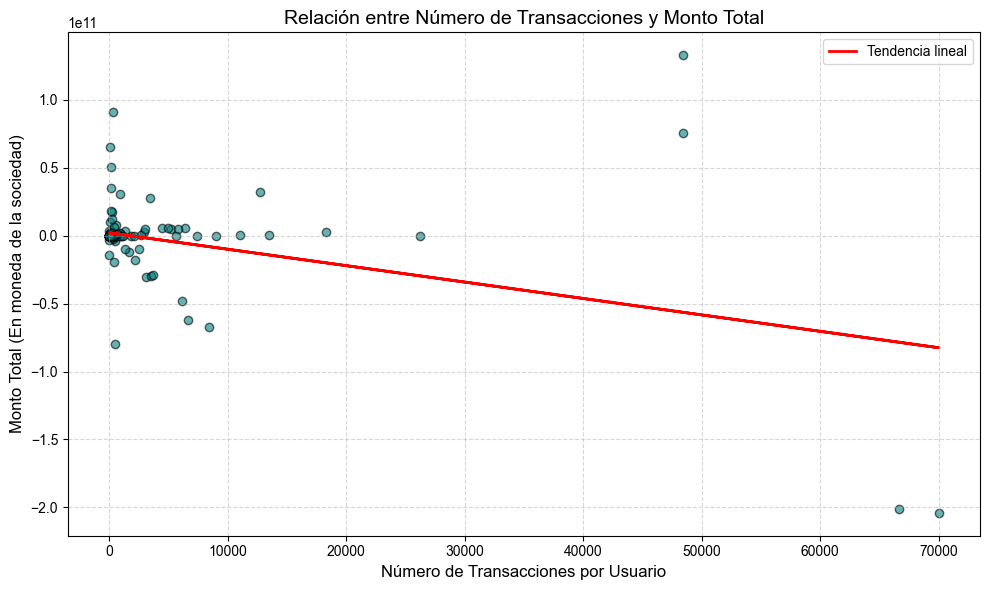

In [26]:
import numpy as np

x = resumen["Numero_Transacciones"]
y = resumen["Monto_Total"]
m, b = np.polyfit(x, y, 1)
plt.figure(figsize=(10,6))
plt.scatter(x, y, alpha=0.6, color="teal", edgecolors="black")
plt.plot(x, m*x + b, color="red", linewidth=2, label="Tendencia lineal")

plt.title("Relación entre Número de Transacciones y Monto Total", fontsize=14)
plt.xlabel("Número de Transacciones por Usuario", fontsize=12)
plt.ylabel("Monto Total (En moneda de la sociedad)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
